In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

In [ ]:
df = pd.read_csv("/content/Bioethanol - Balrampur.csv")
df.head()

,Yeast vessels(x10^8),Pre fermenters,Fermenters,TSS of fermented wash before decanter,TSS of clarified wash after decanter,TRS of molasses received for process,Fermentation water pH,Fermentation water hardness,Bioethanol Concentration
0,2.71,1.91,4.70,17200,9500,57.3,6.08,132,11.73
1,2.81,1.90,4.84,17000,9400,58.0,6.06,320,11.73
2,2.55,1.85,4.96,16200,9000,58.2,6.06,136,11.72
3,2.91,1.83,4.80,16000,8900,58.3,6.09,132,11.75
4,2.70,1.88,4.76,17000,9500,58.5,6.18,144,11.73


In [ ]:
df.describe()

,Yeast vessels(x10^8),Pre fermenters,Fermenters,TSS of fermented wash before decanter,TSS of clarified wash after decanter,TRS of molasses received for process,Fermentation water pH,Fermentation water hardness,Bioethanol Concentration
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,2.729200,1.865350,4.769200,16884.000000,8989.75000,56.432000,6.679900,137.140000,11.178700
std,0.063256,0.143652,0.067085,423.780484,286.45991,0.933142,0.324366,21.053573,0.483133
min,2.550000,1.360000,4.600000,16000.000000,8400.00000,55.520000,6.060000,108.000000,10.140000
25%,2.690000,1.810000,4.737500,16550.000000,8787.50000,55.687500,6.420000,131.000000,10.827500
50%,2.730000,1.860000,4.780000,16900.000000,8950.00000,56.090000,6.675000,134.500000,11.200000
75%,2.780000,1.910000,4.812500,17200.000000,9200.00000,56.975000,6.962500,138.000000,11.650000
max,2.910000,2.810000,4.960000,17800.000000,9600.00000,59.090000,7.320000,320.000000,11.860000


In [ ]:
df.isnull().sum()

Yeast vessels(x10^8)                     0
Pre fermenters                           0
Fermenters                               0
TSS of fermented wash before decanter    0
TSS of clarified wash after decanter     0
TRS of molasses received for process     0
Fermentation water pH                    0
Fermentation water hardness              0
Bioethanol Concentration                 0
dtype: int64

In [ ]:
# df = df.fillna(df.mean())

In [ ]:
x = df.loc[:, df.columns != "Bioethanol Concentration"]
y = df.loc[:, ["Bioethanol Concentration"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train

(90, 8) (10, 8) (90, 1) (10, 1)


,Yeast vessels(x10^8),Pre fermenters,Fermenters,TSS of fermented wash before decanter,TSS of clarified wash after decanter,TRS of molasses received for process,Fermentation water pH,Fermentation water hardness
18,2.83,1.900,4.75,16600,8600,56.67,7.12,140
30,2.71,1.850,4.72,16900,8800,55.90,7.06,108
73,2.69,1.925,4.79,16750,9050,55.98,6.86,138
33,2.65,1.810,4.64,16600,8800,55.58,6.96,134
90,2.80,1.870,4.83,17600,9100,56.72,6.18,127
...,...,...,...,...,...,...,...,...
60,2.80,1.910,4.77,16300,8850,55.73,6.39,129
71,2.71,1.895,4.69,16650,8950,55.94,6.94,140
14,2.61,1.880,4.74,17100,9200,57.40,7.23,132
92,2.82,1.810,4.84,17700,9000,56.92,6.30,123


In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))  # # input layer
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))    ## output layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 32)                288       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,745
Trainable params: 8,745
Non-trainabl

In [ ]:
model.compile(loss='mape', optimizer='adam')
history=model.fit(X_train, y_train, epochs=500, batch_size=10, verbose=1, validation_split=0.1)

Epoch 1/500
9/9 [==============================] - 1s 29ms/step - loss: 307.0943 - val_loss: 107.4180
Epoch 2/500
9/9 [==============================] - 0s 7ms/step - loss: 82.6608 - val_loss: 54.3915
Epoch 3/500
9/9 [==============================] - 0s 7ms/step - loss: 64.9201 - val_loss: 16.5358
Epoch 4/500
9/9 [==============================] - 0s 6ms/step - loss: 43.4996 - val_loss: 24.3753
Epoch 5/500
9/9 [==============================] - 0s 6ms/step - loss: 18.1303 - val_loss: 14.0713
Epoch 6/500
9/9 [==============================] - 0s 7ms/step - loss: 11.0469 - val_loss: 24.0748
Epoch 7/500
9/9 [==============================] - 0s 6ms/step - loss: 32.2965 - val_loss: 11.6555
Epoch 8/500
9/9 [==============================] - 0s 7ms/step - loss: 10.9332 - val_loss: 14.7069
Epoch 9/500
9/9 [==============================] - 0s 6ms/step - loss: 8.9701 - val_loss: 22.5258
Epoch 10/500
9/9 [==============================] - 0s 8ms/step - loss: 15.7843 - val_loss: 16.9699
Epoch 1

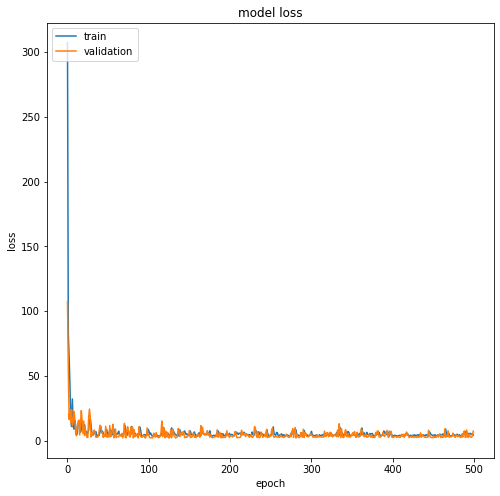

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(X_train, y_train, verbose=1)

3/3 [==============================] - 0s 3ms/step - loss: 7.8671


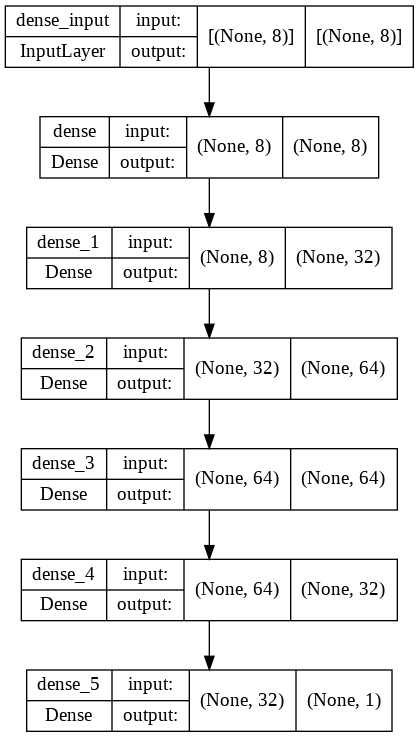

In [ ]:
import tensorflow as tf
tf.keras.utils .plot_model(model,to_file='simple.png',show_shapes=True)

In [ ]:
wt=model.weights
print(wt)

[<tf.Variable 'dense/kernel:0' shape=(8, 8) dtype=float32, numpy=
array([[ 0.01990469, -0.04332834, -0.0483287 ,  0.03178462, -0.01383719,
        -0.03565603,  0.01363338,  0.0268585 ],
       [ 0.00828901,  0.03979232, -0.0408349 ,  0.01499719,  0.0543017 ,
         0.03202547,  0.00233697, -0.05575503],
       [-0.08876426, -0.01789637, -0.00697483,  0.00494425,  0.08427664,
        -0.03923253, -0.06740841,  0.04385488],
       [-0.0716278 ,  0.00363804,  0.02690079,  0.00899312,  0.01734934,
         0.02354965,  0.00651352, -0.00611885],
       [ 0.0347069 ,  0.0214684 , -0.06631388, -0.02848618,  0.02628725,
        -0.01327089, -0.01361152, -0.00184633],
       [ 0.00384495,  0.03875329,  0.07246681, -0.00305582,  0.02337451,
         0.0198306 , -0.07117016,  0.01170637],
       [ 0.05748419, -0.11939796,  0.01863073,  0.01707879, -0.01447403,
        -0.02177773, -0.08678918, -0.05979534],
       [ 0.08544265,  0.06600396,  0.0426768 , -0.04010539, -0.02226941,
         0.033

In [ ]:
Result =pd.DataFrame(wt)
Result.to_csv('result1.csv')

In [ ]:
res=model.predict(X_test)
df_prediction=pd.DataFrame(res, index=y_test.index, columns=['Predictions'])
df_prediction['y_test'] = y_test

In [ ]:
# x_prec = pd.read_csv('')

In [ ]:
res

array([[12.467141 ],
       [12.296204 ],
       [11.89172  ],
       [12.0913925],
       [12.065406 ],
       [11.650983 ],
       [12.061919 ],
       [12.378419 ],
       [12.164435 ],
       [12.477991 ]], dtype=float32)

In [ ]:
y_test

,Bioethanol Concentration
83,11.44
53,11.35
70,10.83
45,10.87
44,10.81
39,10.54
22,10.94
80,11.23
10,11.70
0,11.73


In [ ]:
type(res)

numpy.ndarray

In [ ]:
i = 0
for i in range(9):
  print(y_test[i])

KeyError: ignored